# Supplementary figure 2
Figure S2 complements figure 5 and is based on the same data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import seaborn
import sklearn.decomposition
import tqdm
import itertools
%matplotlib inline
#matplotlib.rc('text', usetex=True)

In [2]:
seaborn.set_context("paper")
seaborn.set_style("white")

In [7]:
dataPath = '../../../data/permLambda/'

In [8]:
ar = np.load(dataPath + 'original.npz')

In [9]:
w = ar['weights']

In [10]:
first = True
dists = {'none': [], 'cols': [], 'rows': [], 'ind': []}
for p in tqdm.tqdm(itertools.permutations(range(4)), total=4*3*2*1):
    if first:
        first = False
        continue
    for k in dists.keys():
        wprime = np.load(dataPath+'%s_%d%d%d%d.npz' % ((k,)+p))['weights']
        d = np.sqrt(np.sum((wprime-w)**2))
        dists[k].append(d)

24it [02:59,  7.83s/it]


In [15]:
N = ar['spikes'].shape[1]
spike_bin_time = 40 #ms
spike_vectors = ar['spikes'].reshape(-1,40,N).sum(axis=1)/1000

In [16]:
excitatorySpikes = np.vstack(np.nonzero(ar["spikes"][:, :80])).T
inhibitorySpikes = np.vstack(np.nonzero(ar["spikes"][:, -20:])).T

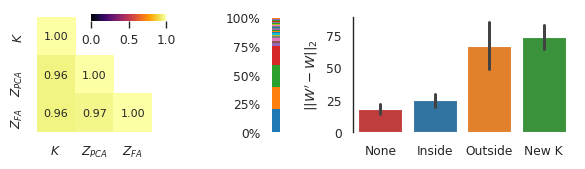

In [21]:
pca = sklearn.decomposition.PCA().fit(spike_vectors)
fa = sklearn.decomposition.FactorAnalysis(n_components=2).fit(spike_vectors)
zPca = np.copy(pca.components_[:2,:]).T
zPca[:,1] *= -1
zFa = -np.copy(fa.components_).T

seaborn.reset_defaults()
seaborn.set_context(context="paper")
seaborn.set_style('white')

fig, axs = plt.subplots(1,3,figsize=(7.5,1.5), gridspec_kw={'width_ratios': [0.48,0.02,0.5], 'wspace': .5})#,dpi=300)
cbarAx = fig.add_axes([0.26, 0.85, 0.1, 0.05])
order = (ar["encoders"], zPca, zFa)
angles = np.array([[scipy.linalg.subspace_angles(a, b).mean() for a in order] for b in order])
labels = ("$K$", "$Z_{PCA}$", "$Z_{FA}$")
seaborn.heatmap(np.cos(angles), vmin=0, vmax=1, annot=True, square=True, fmt=".2f",
                cmap='inferno', cbar_kws={ 'orientation': 'horizontal', 'ticks': [0,0.5,1.0]},
                mask=1-np.tri(3), ax=axs[0], cbar_ax=cbarAx, annot_kws={'fontsize': 8},#, 'color': 'w'},
                xticklabels=labels, yticklabels=labels
               )
evr = pca.explained_variance_ratio_[:200]
axs[1].bar(np.zeros(200)+.5, evr, 1, [0]+list(np.cumsum(evr)[:-1]), color=seaborn.color_palette(), edgecolor="none")
axs[1].set_ylim(0,1)
axs[1].set_xlim(0,1)
axs[1].set_xticks([])
axs[1].set_yticks(np.linspace(0,1,5))
axs[1].set_yticklabels(["%.0f%%" % t for t in np.linspace(0,100,5)])
seaborn.despine(ax=axs[1], left = True, bottom=True, trim=False)
seaborn.despine(ax=axs[2], left = False, bottom=True, trim=False)

seaborn.barplot(data=[dists['none'], dists['cols'], dists['rows'], dists['ind'][:18]+dists['ind'][19:]],
                ci="sd", palette=["C3","C0","C1","C2"], ax=axs[2])#", whis=2.0)
axs[2].set_xticklabels(["None", "Inside", "Outside", "New K"])
axs[2].set_ylabel("$||W' - W||_2$")
plt.show()
#plt.savefig("figS2_part1.svg", frameon=False, dpi=300)

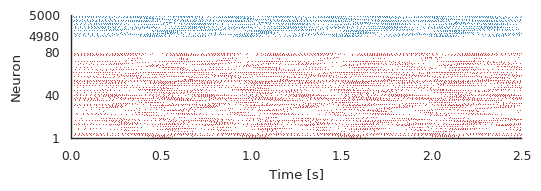

In [22]:
plt.figure(figsize=(5.5, 2.0))
plt.plot(excitatorySpikes[:,0]/1000.0, excitatorySpikes[:,1], '.', ms=1.5, color='C3', markeredgewidth=0.0)
plt.plot(inhibitorySpikes[:,0]/1000.0, inhibitorySpikes[:,1]+95, '.', ms=1.5, color='C0', markeredgewidth=0.0)
plt.gca().set_ylim(0, 115)
plt.gca().set_xlabel("Time [s]")
plt.gca().set_ylabel("Neuron")
plt.gca().set_xlim(0,2.5)
plt.gca().set_yticks([0,40,80,95,115])
plt.gca().set_yticklabels([1,40,80,4980,5000])
seaborn.despine()#trim=True)
plt.tight_layout()
plt.show()
#plt.savefig("rasterPlotBigNEF.svg", dpi=300)

# Previous versions

Can safely be ignored

In [ ]:
ax

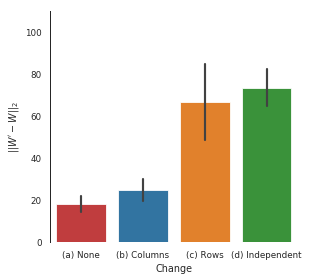

In [69]:
plt.figure(figsize=(4.4,4))
#dists['ind'] at index 18 did not converge properly and has been excluded
seaborn.barplot(data=[dists['none'], dists['cols'], dists['rows'], dists['ind'][:18]+dists['ind'][19:]],
                ci="sd", palette=["C3","C0","C1","C2"])#", whis=2.0)
plt.xticks(range(4), ["(a) None", "(b) Columns", "(c) Rows", "(d) Independent"])
plt.xlabel("Change")
plt.ylim(0,110)
plt.ylabel("$||W' - W||_2$")
plt.tight_layout()
seaborn.despine(bottom=True)
plt.show()

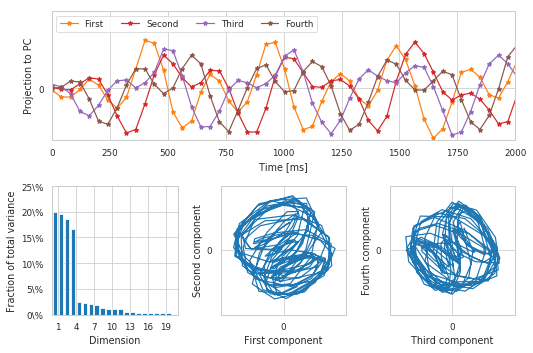

In [8]:
pca = sklearn.decomposition.PCA().fit(spike_vectors)
plt.figure(figsize=(7.5, 5))
plt.subplot2grid((2,3),(1,0),colspan=1)
plt.bar(np.arange(20)+0.5, pca.explained_variance_ratio_[:20])
plt.yticks(np.arange(0,0.3,0.05), ["%d\%%"%i for i in range(0,30,5)])
plt.xticks(np.arange(0,20,3)+1, np.arange(0,20,3)+1)
plt.xlim(0,21)
plt.xlabel("Dimension")
plt.ylabel("Fraction of total variance")
plt.subplot2grid((2,3),(0,0),colspan=3)
components = pca.transform(spike_vectors)[:,:4]
colors = np.array(seaborn.color_palette())[(1,3,4,5), :]
for i in range(4):
    plt.plot(np.linspace(0,10*1000,250), components[:,i], '-*', c=colors[i])
plt.yticks([0])
plt.xlim(0,2*1000)
plt.xlabel("Time [ms]")
plt.ylabel("Projection to PC")
plt.legend(["First", "Second", "Third", "Fourth"], ncol=4, loc=2)
plt.ylim(-80,120)
for i in range(2):
    plt.subplot2grid((2,3),(1,i+1))
    plt.plot(components[:,0+2*i], components[:,1+2*i])
    plt.axis('equal')
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    plt.xticks([0])
    plt.yticks([0])
    plt.xlabel(["First component", "Third component"][i])
    plt.ylabel(["Second component", "Fourth component"][i])
plt.tight_layout()
#plt.savefig('../figures/principal_component_analysis.tiff', dpi=300, transparent=False, frameon=False)

In [ ]:
np.sum(pca.explained_variance_ratio_[:4])

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        plt.subplot2grid((4,4),(i,j))
        plt.plot(components[:,i], components[:,j])
        plt.axis('equal')
        plt.xlim(-120,120)
        plt.ylim(-120,120)
        plt.xticks([0])
        plt.yticks([0])
        plt.xlabel(["First", "Second", "Third", "Fourth"][i] + " component")
        plt.ylabel(["First", "Second", "Third", "Fourth"][j] + " component")
plt.tight_layout()

In [ ]:
fa = sklearn.decomposition.FactorAnalysis(iterated_power=8, n_components=30)
fa.fit(spike_vectors)

In [ ]:
cov = fa.components_.dot(fa.components_.T)
eigs = np.linalg.eigvalsh(cov)[::-1]
plt.bar(np.arange(30)+0.5, eigs[:30]/np.sum(eigs))